In [4]:
from model_utils import configuration as cnf
from plotting import model_plots
from plotting import data_plots
from model_utils import initialisation as init
import model_modules
import pyomo.environ as pyo

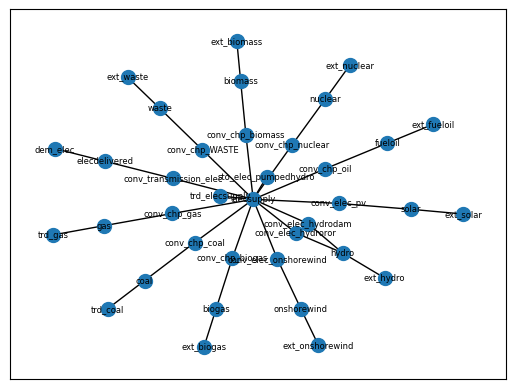

In [5]:
# Show network complexity
data_plots.plot_io_network(cnf.DATA)

In [13]:
# Model setup
model = init.init_model()

model_modules.trade.configure_sector(model)
model_modules.extraction.configure_sector(model)
model_modules.storage.configure_sector(model)

model_modules.electricity.configure_sector(model)
model_modules.transmission.configure_sector(model)
# # model_modules.passenger.configure_sector(model)

model_modules.demands.configure_sector(model)

In [7]:
tot_cost_expr = model.dem_e_CostTotal + model.elec_e_CostTotal + model.ext_e_CostTotal + model.sto_e_CostTotal + model.trd_e_CostTotal + model.etrans_e_CostTotal

In [8]:
model = init.run(model, tot_cost_expr)


Problem: 
- Name: unknown_copy
  Lower bound: 11791298093.389296
  Upper bound: 11791298093.389296
  Number of objectives: 1
  Number of constraints: 84870
  Number of variables: 68940
  Number of binary variables: 0
  Number of integer variables: 0
  Number of continuous variables: 68940
  Number of nonzeros: 210322
  Sense: 1
  Number of solutions: 1
Solver: 
- Name: Gurobi 9.52
  Status: ok
  Wallclock time: 0.9715778827667236
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



# Plotting

In [9]:
for y in model.Y:
    print(y, model.e_TotalAnnualActivity["dem_elec", y]())

1990 46.74973802076895
1991 47.761454623562855
1992 48.04248701322784
1993 47.41317519779948
1994 47.06991420756583
1995 48.05854600692298
1996 48.87153256273952
1997 48.79123759426382
1998 49.80295419705774
1999 51.401827756830265
2000 52.56610479972802
2001 53.878656534695374
2002 54.24649272266669
2003 55.09295134029003
2004 56.25548831333882
2005 57.27134410762613
2006 57.676175826661506
2007 57.45023446675025
2008 58.73821328852817
2009 57.52305002441749
2010 59.727144973325636
2011 58.58772460270477
2012 58.99180875829933
2013 59.341888205743935
2014 57.46394794005157
2015 58.15042743075133
2016 58.25112165158535
2017 58.48124665279891
2018 57.661261331170245
2019 57.22220292998846


In [10]:
for y in model.Y:
    print(y, cnf.DATA.get_annual("dem_elec", "actual_demand", y))

1990 46.578
1991 47.586
1992 47.866
1993 47.239
1994 46.897
1995 47.882
1996 48.692
1997 48.612
1998 49.62
1999 51.213
2000 52.373
2001 53.749
2002 54.029
2003 55.122
2004 56.171
2005 57.33
2006 57.782
2007 57.432
2008 58.729
2009 57.494
2010 59.785
2011 58.599
2012 58.973
2013 59.323
2014 57.466
2015 58.246
2016 58.239
2017 58.483
2018 57.647
2019 57.198


<AxesSubplot:title={'center':"Modelled:Input:['elecsupply']"}, ylabel='TWh'>

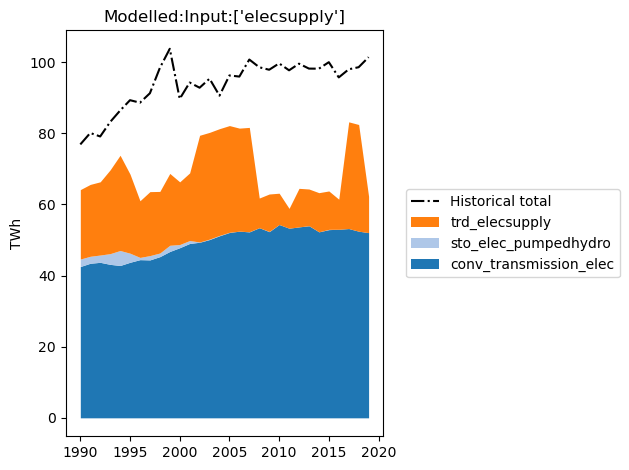

In [11]:
model_plots.plot_flow_fin(model, cnf.DATA, ["elecsupply"], unit="TWh", hist="elecsupply")

<AxesSubplot:title={'center':"Modelled:flow:['elecsupply']"}, ylabel='TWh'>

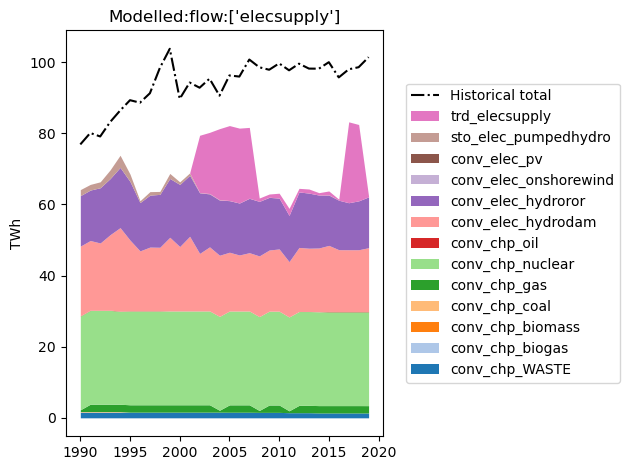

In [12]:
model_plots.plot_flow_fout(model, cnf.DATA, ["elecsupply"], unit="TWh", hist="elecsupply")

In [ ]:
model_plots.plot_group_ctot(model, ["_elec_", "_chp_"], unit="GW")

In [ ]:
model_plots.plot_group_cnew(model, ["_elec_", "_chp_"], unit="GW")

# Debug
Check your model run :)

In [ ]:
from pyomo.util import infeasible
infeasible.log_infeasible_constraints(model, log_expression=True, log_variables=True)
infeasible.log_infeasible_bounds(model)
# infeasible.log_close_to_bounds(model)

In [ ]:
import gurobi

model.write("debug.lp", format="lp", io_options={"symbolic_solver_labels": True})
m = gurobi.read("debug.lp")
m.optimize()
m.computeIIS()
m.write("debug_{0}.ilp".format("CHE"))